# If you just want to see the code of Mento Carlo Simulation and the result, please jump to Mento Carlo Simulation  part

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
S1 = pd.read_csv("S1_new.csv")
S2 = pd.read_csv("S2_new.csv")
S3 = pd.read_csv("S3_new.csv")
S1.replace(0, np.nan, inplace=True)
S2.replace(0, np.nan, inplace=True)
S3.replace(0, np.nan, inplace=True)

In [4]:
S1 = S1.drop(columns=["Unnamed: 0"])
S2 = S2.drop(columns=["Unnamed: 0"])
S3 = S3.drop(columns=["Unnamed: 0"])
S1.value_counts

<bound method DataFrame.value_counts of      UTC Datetime    Local Datetime  countlineId               countlineName  \
0      05/17/2021  05/17/2021 01:00        22989          S1_georgeSt_dlr001   
1      05/17/2021  05/17/2021 01:00        22989          S1_georgeSt_dlr001   
2      05/17/2021  05/17/2021 01:00        22988  S1_georgeSt_pathLHS_dlr001   
3      05/17/2021  05/17/2021 01:00        22988  S1_georgeSt_pathLHS_dlr001   
4      05/17/2021  05/17/2021 01:00        22990  S1_georgeSt_pathRHS_dlr001   
...           ...               ...          ...                         ...   
4279   04/30/2023  05/13/2023 00:59        22989          S1_georgeSt_dlr001   
4280   04/30/2023  05/14/2023 00:59        22988  S1_georgeSt_pathLHS_dlr001   
4281   04/30/2023  05/15/2023 00:59        22988  S1_georgeSt_pathLHS_dlr001   
4282   04/30/2023  05/16/2023 00:59        22990  S1_georgeSt_pathRHS_dlr001   
4283   04/30/2023  05/17/2023 00:59        22990  S1_georgeSt_pathRHS_dlr001   


In [5]:
print("number of duplicate rows in sensor 1",S1.duplicated().sum())
print("number of duplicate rows in sensor 2",S2.duplicated().sum())
print("number of duplicate rows in sensor 3",S3.duplicated().sum())
S1 = pd.DataFrame.drop_duplicates(S1).reset_index()
S2 = pd.DataFrame.drop_duplicates(S2).reset_index()
S3 = pd.DataFrame.drop_duplicates(S3).reset_index()

number of duplicate rows in sensor 1 0
number of duplicate rows in sensor 2 0
number of duplicate rows in sensor 3 0


In [6]:
S2 = S2.dropna().reset_index()

In [7]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_month = S2_avg.groupby(['year','month'],as_index=False).mean()
S2_month.head()

,year,month,level_0,index,countlineId,Pedestrian
0,2021,5,44.5,44.5,22995.0,1739.337495
1,2021,6,179.5,179.5,22995.0,1789.227500
2,2021,7,362.5,362.5,22995.0,1913.817989
3,2021,8,548.5,548.5,22995.0,1905.050058
4,2021,9,731.5,731.5,22995.0,1882.354871


In [8]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["day"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.day
S2_day = S2_avg.groupby(['year','month','day'],as_index=False).mean()
S2_day.head()

,year,month,day,level_0,index,countlineId,Pedestrian
0,2021,5,17,2.5,2.5,22995.0,1686.932580
1,2021,5,18,8.5,8.5,22995.0,1821.819014
2,2021,5,19,14.5,14.5,22995.0,1973.085278
3,2021,5,20,20.5,20.5,22995.0,1104.670661
4,2021,5,21,26.5,26.5,22995.0,1413.372727


In [9]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
S2_week = S2_avg.groupby(['year','month','week'],as_index=False).mean()
S2_week.head()

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_92985/922864987.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week


,year,month,week,level_0,index,countlineId,Pedestrian
0,2021,5,20,20.5,20.5,22995.0,1660.836220
1,2021,5,21,62.5,62.5,22995.0,1773.497399
2,2021,5,22,86.5,86.5,22995.0,2049.727093
3,2021,6,22,107.5,107.5,22995.0,1895.094736
4,2021,6,23,146.5,146.5,22995.0,1850.545393


In [10]:
from scipy import stats
S2_month_new = S2_month[(np.abs(stats.zscore(S2_month["Pedestrian"])) < 3)]
S2_week_new = S2_week[(np.abs(stats.zscore(S2_week["Pedestrian"])) < 3)]
S2_day_new = S2_day[(np.abs(stats.zscore(S2_day["Pedestrian"])) < 3)]

In [11]:
def sata_analy(data):
    print("skewness:",skew(data["Pedestrian"], axis=0, bias=True))
    print("kurtosis:",kurtosis(data["Pedestrian"], axis=0, bias=True))
    print("variance:",statistics.variance(data["Pedestrian"]))
    print("mean:",statistics.mean(data["Pedestrian"]))

In [13]:
#print("S2 Month")
#sata_analy(S2_month_new)
#print("S2 Day")
#sata_analy(S2_day_new)
#print("S2 Week")
#sata_analy(S2_week_new)

## The Fitter test
### The fitter is a very convenient library to find the best distribution for random data

In [14]:
from fitter import Fitter, get_common_distributions, get_distributions

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 19.35it/s]


S2 weekly data 


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000125,1435.803905,-1658.030044,inf,0.076130,4.620552e-01
gamma,0.000126,1439.906759,-1652.554047,inf,0.081663,3.748572e-01
cauchy,0.000128,1471.557252,-1655.339695,inf,0.070879,5.534579e-01
rayleigh,0.000189,inf,-1608.397198,inf,0.268657,3.340247e-08
powerlaw,0.000215,1353.957820,-1587.508089,inf,0.234131,2.567377e-06


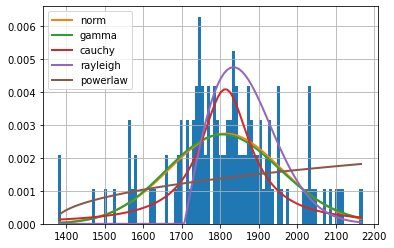

In [15]:
a = Fitter(S2_week_new["Pedestrian"],
           distributions= get_common_distributions()
                         )

a.fit()

print("S2 weekly data ")
a.summary()

In [16]:
print("the best distribution for weekly data will be")
a.get_best(method = 'sumsquare_error')

the best distribution for weekly data will be


{'norm': {'loc': 1812.7905031823586, 'scale': 146.08135968996325}}

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 27.30it/s]


S2 monthly data 


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.003135,1233.826731,-205.101074,inf,0.096564,0.962790
gamma,0.003136,1234.454313,-205.095002,inf,0.077575,0.996317
norm,0.003137,1232.269332,-208.262021,inf,0.073938,0.998105
cauchy,0.003151,1294.299495,-208.157503,inf,0.095725,0.965440
rayleigh,0.003209,1219.511126,-207.721248,inf,0.169404,0.447472


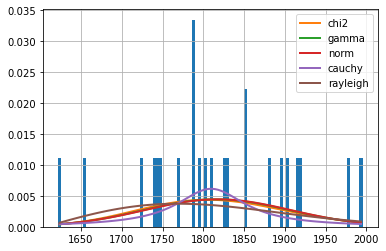

In [17]:
a = Fitter(S2_month_new["Pedestrian"],
           distributions= get_common_distributions())
a.fit()

print("S2 monthly data ")
a.summary()

In [18]:
print("the best distribution for monthly data will be")
a.get_best(method = 'sumsquare_error')

the best distribution for monthly data will be


{'chi2': {'df': 134.56575115733435,
  'loc': 1063.6045245004152,
  'scale': 5.593798216214665}}

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 15.47it/s]


S2 daily data


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000005,1612.190677,-13154.435805,inf,0.046140,9.633549e-02
norm,0.000005,1609.563185,-13157.614564,inf,0.042581,1.507065e-01
chi2,0.000005,1617.758754,-13143.836557,inf,0.055106,2.660140e-02
cauchy,0.000009,1609.379625,-12796.005025,inf,0.068449,2.570790e-03
powerlaw,0.000038,1475.660445,-11788.627094,inf,0.231712,9.163788e-34


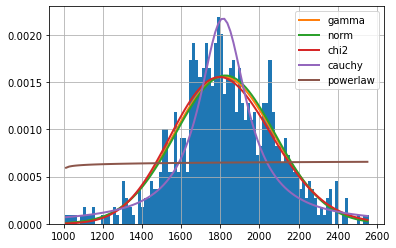

In [19]:
a = Fitter(S2_day_new["Pedestrian"],
           distributions= get_common_distributions())
a.fit()


print("S2 daily data")
a.summary()

In [20]:
print("the best distribution for daily data will be")
a.get_best(method = 'sumsquare_error')

the best distribution for daily data will be


{'gamma': {'a': 587.0391501652769,
  'loc': -4381.495349414667,
  'scale': 10.57366672992547}}

## Anderson-Darling Test

In [21]:
from scipy.stats import anderson
print("S2 Month:")
print(anderson(S2_month_new["Pedestrian"]))
print("S2 Week:")
print(anderson(S2_week_new["Pedestrian"]))
print("S2 Day:")
print(anderson(S2_day_new["Pedestrian"]))

S2 Month:
AndersonResult(statistic=0.18778352676370247, critical_values=array([0.513, 0.584, 0.701, 0.817, 0.972]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
S2 Week:
AndersonResult(statistic=0.7165367757363015, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
S2 Day:
AndersonResult(statistic=1.0540618816382903, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


### Based on Anderson-Darling Test, S2 Monthly data is the only data which statisitc number is smaller than critical, in other word, it is the only one which don't reject the null hypotheses from a normal distribution.

## Mento Carlo Simulation 

In [22]:
import sympy as smp
def mento(data,f):
    y,x,s,m = smp.symbols("x s m y")
    fs = smp.integrate(f,(x,0,y)).doit()
    Fn = smp.lambdify((y,s,m),fs)
    fn = smp.lambdify((x,s,m),f)
    s=data["Pedestrian"].std()
    m=data["Pedestrian"].mean()
    x = np.linspace(min(data["Pedestrian"]),max(data["Pedestrian"]),len(data["Pedestrian"]))
    f = fn(x,s,m)
    F = Fn(x,s,m)
    us = np.random.rand(len(data))
    F_inv = x[np.searchsorted(F[:-1],us)]
    plt.plot(x,f)
    plt.hist(F_inv,histtype="step",color="r",density="norm")
    plt.show()
    return F_inv

S2 Month


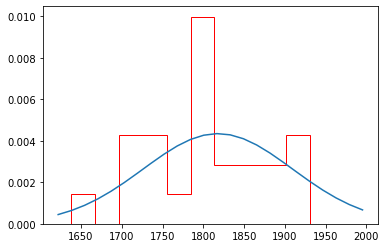

array([1816.69812302, 1784.24590452, 1719.34146751, 1784.24590452,
       1849.15034152, 1800.47201377, 1638.21092126, 1751.79368602,
       1930.28088777, 1735.56757677, 1897.82866927, 1832.92423227,
       1865.37645077, 1768.01979527, 1703.11535826, 1930.28088777,
       1914.05477852, 1719.34146751, 1784.24590452, 1784.24590452,
       1784.24590452, 1751.79368602, 1881.60256002, 1784.24590452])

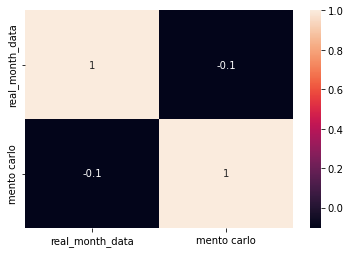

In [23]:
print("S2 Month")
y,x,s,m = smp.symbols("x s m y")
f = 1/(s*(np.pi*2)**(1/2))*smp.exp(-(x-m)**2/(2*s**2))
a = mento(S2_month_new,f)
data = {"real_month_data":S2_month_new["Pedestrian"],
       "mento carlo":a,
       }
data = pd.DataFrame(data)
sns.heatmap(data.corr(), annot = True)
a

S2 week


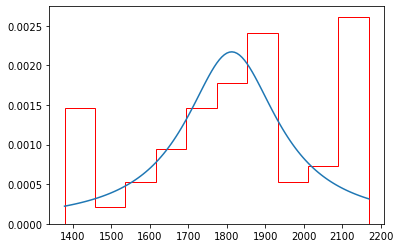

<AxesSubplot:>

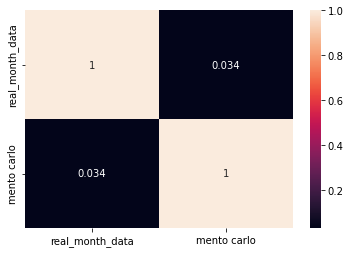

In [24]:
print("S2 week")
y,x,s,m = smp.symbols("x s m y")
f = 1/(np.pi*s*(1+((x-m)/s)**2))
a = mento(S2_week_new,f)
data = {"real_month_data":S2_week_new["Pedestrian"],
       "mento carlo":a,
       }
data = pd.DataFrame(data)
sns.heatmap(data.corr(), annot = True)

S2 day


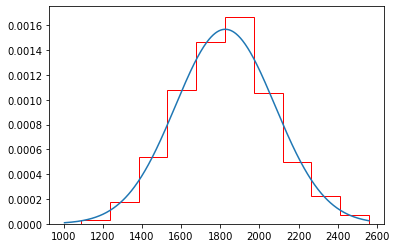

<AxesSubplot:>

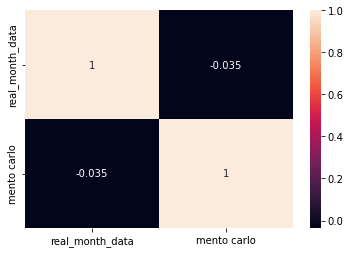

In [25]:
print("S2 day")
y,x,s,m = smp.symbols("x s m y")
f = 1/(s*(np.pi*2)**(1/2))*smp.exp(-(x-m)**2/(2*s**2))
a = mento(S2_day_new,f)
data = {"real_month_data":S2_day_new["Pedestrian"],
       "mento carlo":a,
       }
data = pd.DataFrame(data)
sns.heatmap(data.corr(), annot = True)

# Conclusion

### After repeated testing, I found that the mento carlo simulation is very unstable, sometimes the generated random values will be kind of close to the real value, but sometimes it will be far away. Also the file you see is the one I have adjusted a bit, which means that all the data are the result after I have removed all the extreme values. Based on the fitter test results (you can see the detailed icons and conclusions in the fitter test part), the normal distribution can be applied to the daily and monthly data, while the cauchy distribution is matched to the weekly data. Also, at the beginning I tried to use the beta distribution for testing, and although the results were good I gave up since the beta distribution only produces a value between 0 and 1. All in all, mento carlo simulation has many limitations, and the best score of correlation for mento carlo simulation is only 0.5, so I personally think it is not suitable to use it to predict missing values
